<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Общее-впечатление" data-toc-modified-id="Общее-впечатление-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span><font color="orange">Общее впечатление</font></a></span></li><li><span><a href="#Общее-впечатление-(ревью-2)" data-toc-modified-id="Общее-впечатление-(ревью-2)-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span><font color="orange">Общее впечатление (ревью 2)</font></a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve 
import matplotlib.pyplot as plt

In [2]:
#выберем переменную для значения random_state
rand = 123

In [3]:
data = pd.read_csv("Churn_Modelling.csv", sep=',')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data.Tenure.describe()

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64

In [6]:
data.Tenure = data.Tenure.fillna(data.Tenure.mean())

In [7]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
#проверим наличие дублей в данных
data.duplicated().sum()

0

In [9]:
#разделим данные на целевой показатель и признаки, опустив при разбиении столбцы, ненужные модели для обучения
target = data['Exited']
features = data.drop(['Exited', 'RowNumber', 'CustomerId', 'Surname'], axis=1)

In [10]:
#заменим категориальные признаки на численные техникой OHE
features_ohe = pd.get_dummies(features)

In [11]:
features_ohe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


## Исследование задачи

Разобьем данные на 3 выборки: тренировочную, валидационную и тестовую, в пропорции 6:2:2

In [12]:
features_train, features_temp, target_train, target_temp = train_test_split(features_ohe, target, test_size=0.4, random_state=rand)
features_valid, features_test, target_valid, target_test = train_test_split(features_temp, target_temp, test_size=0.5, random_state=rand)

In [13]:
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(6000, 13)
(2000, 13)
(2000, 13)


In [14]:
#приведем численные признаки к одинаковому масштабу
numeric = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.py

In [15]:
classification_models = [DecisionTreeClassifier(random_state=rand), 
                         RandomForestClassifier(random_state=rand), 
                         LogisticRegression(random_state=rand, solver='liblinear')]

In [16]:
for model in classification_models:
    model = model
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    print("Модель")
    print(model)
    print("F1 на валидационной выборке: ", f1_score(target_valid, predictions))

Модель
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')
F1 на валидационной выборке:  0.4963503649635037


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Модель
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)
F1 на валидационной выборке:  0.529505582137161
Модель
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=123, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
F1 на валидационной выборке:  0.28787878787878785


По результатам видно, что наилучшее значение метрики f1 показывает модель случайного леса, подберем гиперпараметры для леса и для дерева решений.

In [17]:
#подберем наилучшие гиперпараметры глубины для модели случайного леса
best_model_tree = None
best_result_tree = 0
best_result_auc = 0
for i in range(1,25):
    model = RandomForestClassifier(max_depth = i, random_state=rand) 
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    result = f1_score(target_valid, predictions)
    result_1 = roc_auc_score(target_valid, probabilities_one_valid)
    if result > best_result_tree:
        #if result_1 > best_result_auc:
            best_model_tree = model
            best_result_tree = result
            best_result_auc = result_1
print('Лучшая модель леса: {}'.format(best_model_tree))
print('Лучшее значение f1: {}'.format(best_result_tree))
#print('Лучшее значение roc_auc: {}'.format(best_result_auc))

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The defaul

Лучшая модель леса: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=19, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)
Лучшее значение f1: 0.5602503912363067


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [18]:
#подберем наилучшие гиперпараметры количества деревьев для модели случайного леса
best_model_tree = None
best_result_tree = 0
best_result_auc = 0
for i in range(5,100):
    model = RandomForestClassifier(n_estimators = i, max_depth = 19, random_state=rand) 
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    result = f1_score(target_valid, predictions)
    result_1 = roc_auc_score(target_valid, probabilities_one_valid)
    if result > best_result_tree:
        #if result_1 > best_result_auc:
            best_model_tree = model
            best_result_tree = result
            best_result_auc = result_1
print('Лучшая модель леса: {}'.format(best_model_tree))
print('Лучшее значение f1: {}'.format(best_result_tree))
#print('Лучшее значение roc_auc: {}'.format(best_result_auc))

Лучшая модель леса: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=19, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=49,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)
Лучшее значение f1: 0.5943396226415094


Лучшими параметрами случайного леса являются max_depth=19, n_estimators=49.

In [19]:
#подберем наилучшие гиперпараметры глубины для модели дерева решений
best_model_tree = None
best_result_tree = 0
best_result_auc = 0
for i in range(1,11):
    model = DecisionTreeClassifier(max_depth = i, random_state=rand) 
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    result = f1_score(target_valid, predictions)
    result_1 = roc_auc_score(target_valid, probabilities_one_valid)
    if result > best_result_tree:
        #if result_1 > best_result_auc:
            best_model_tree = model
            best_result_tree = result
            best_result_auc = result_1
print('Лучшая модель леса: {}'.format(best_model_tree))
print('Лучшее значение f1: {}'.format(best_result_tree))
#print('Лучшее значение roc_auc: {}'.format(best_result_auc))

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Лучшая модель леса: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')
Лучшее значение f1: 0.5723270440251572


Лучшим параметром для дерева решений явялется max_depth=7. Значение меры f1 дерева решений не превышает значение, полученное другими моделями.

## Борьба с дисбалансом

In [20]:
#исследуем баланс классов
target_train.value_counts()

0    4761
1    1239
Name: Exited, dtype: int64

Из результата видно, что положительное значение результирующего признака встречается в выборке гораздо реже отрицательного значения (~в 3 раза реже). Воспользуемся техникой upsampling для восстановления баланса классов и доведем баланс классов до соотношения 1:1.

In [21]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=rand)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 3)

In [22]:
#проверим значения метрик после восстановления баланса методом upsampling валидационной выборке
best_model_tree = None
best_result_tree = 0
best_result_auc = 0
for i in range(1,30):
    model = RandomForestClassifier(max_depth = i, random_state=rand) 
    model.fit(features_upsampled, target_upsampled)
    predictions = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    result = f1_score(target_valid, predictions)
    result_1 = roc_auc_score(target_valid, probabilities_one_valid)
    if result > best_result_tree:
        #if result_1 > best_result_auc:
            best_model_tree = model
            best_result_tree = result
            best_result_auc = result_1
print('Лучшая модель леса: {}'.format(best_model_tree))
print('Лучшее значение f1: {}'.format(best_result_tree))
print('значение roc_auc: {}'.format(best_result_auc))

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

Лучшая модель леса: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)
Лучшее значение f1: 0.611904761904762
значение roc_auc: 0.853771706354976


In [23]:
#подберем наилучшие гиперпараметры количества деревьев для модели случайного леса
best_model_tree = None
best_result_tree = 0
best_result_auc = 0
for i in range(5,100):
    model = RandomForestClassifier(max_depth = 8, n_estimators=i, random_state=rand) 
    model.fit(features_upsampled, target_upsampled)
    predictions = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    result = f1_score(target_valid, predictions)
    result_1 = roc_auc_score(target_valid, probabilities_one_valid)
    if result > best_result_tree:
        #if result_1 > best_result_auc:
            best_model_tree = model
            best_result_tree = result
            best_result_auc = result_1
print('Лучшая модель леса: {}'.format(best_model_tree))
print('Лучшее значение f1: {}'.format(best_result_tree))
print('значение roc_auc: {}'.format(best_result_auc))

Лучшая модель леса: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=51,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)
Лучшее значение f1: 0.6323353293413173
значение roc_auc: 0.8616656446953365


In [24]:
#проверим значения метрик после восстановления баланса, указав аргумент class_weight
model = RandomForestClassifier(max_depth = 8, n_estimators=51, random_state=rand, class_weight='balanced') 
model.fit(features_train, target_train)
predictions = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
result = f1_score(target_valid, predictions)
result_1 = roc_auc_score(target_valid, probabilities_one_valid)
print('Значение F1: {}'.format(result))
print('Значение ROC-AUC: {}'.format(result_1))

Значение F1: 0.6187717265353418
Значение ROC-AUC: 0.857172658368681


Значение метрики f1  и значение roc_auc уменьшилось.

In [25]:
#протестируем изменение порога классификации
model = RandomForestClassifier(max_depth = 8, n_estimators=51, random_state=rand)
model.fit(features_upsampled, target_upsampled)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]


for threshold in np.arange(0, 0.8, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    result = f1_score(target_valid, predicted_valid)
    result_1 = roc_auc_score(target_valid, predicted_valid)
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    
    print("Порог = {:.2f} | F1 мера = {:.3f}, ROC-AUC = {:.3f}, точность = {:.2f}, полнота = {:.2f}".format(
        threshold, result, result_1, precision, recall))

Порог = 0.00 | F1 мера = 0.329, ROC-AUC = 0.500, точность = 0.20, полнота = 1.00
Порог = 0.02 | F1 мера = 0.329, ROC-AUC = 0.500, точность = 0.20, полнота = 1.00
Порог = 0.04 | F1 мера = 0.330, ROC-AUC = 0.502, точность = 0.20, полнота = 1.00
Порог = 0.06 | F1 мера = 0.337, ROC-AUC = 0.517, точность = 0.20, полнота = 1.00
Порог = 0.08 | F1 мера = 0.346, ROC-AUC = 0.536, точность = 0.21, полнота = 0.99
Порог = 0.10 | F1 мера = 0.358, ROC-AUC = 0.560, точность = 0.22, полнота = 0.99
Порог = 0.12 | F1 мера = 0.364, ROC-AUC = 0.572, точность = 0.22, полнота = 0.98
Порог = 0.14 | F1 мера = 0.376, ROC-AUC = 0.594, точность = 0.23, полнота = 0.98
Порог = 0.16 | F1 мера = 0.392, ROC-AUC = 0.619, точность = 0.24, полнота = 0.98
Порог = 0.18 | F1 мера = 0.407, ROC-AUC = 0.642, точность = 0.26, полнота = 0.97
Порог = 0.20 | F1 мера = 0.420, ROC-AUC = 0.660, точность = 0.27, полнота = 0.95
Порог = 0.22 | F1 мера = 0.433, ROC-AUC = 0.676, точность = 0.28, полнота = 0.95
Порог = 0.24 | F1 мера = 0.4

Подберем порог, выдающий оптимально сбалансированные значения точности и полноты.

## Тестирование модели

In [26]:
#протестируем модель на тестовой выборке
model = RandomForestClassifier(max_depth = 8, n_estimators=51, random_state=rand) 
model.fit(features_upsampled, target_upsampled)
predictions = model.predict(features_test)
probabilities_valid = model.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]

threshold = 0.5
predicted = (probabilities_one_valid > threshold).astype('int')

result = f1_score(target_test, predictions)
result_1 = roc_auc_score(target_test, predicted)

print('Значение F1: {}'.format(result))
print('Значение ROC-AUC: {}'.format(result_1))

Значение F1: 0.6177156177156178
Значение ROC-AUC: 0.7687597707139134


На тестовой выборке значения меры F1  превышает порог в 0.59. Проверим модель на адекватность.

In [27]:
#посчитаем ROC-AUC константной модели
constant_pred = pd.Series(np.zeros(shape=(len(target_test)))).astype('int')
print(roc_auc_score(target_test, constant_pred))

0.5


In [28]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_valid) 

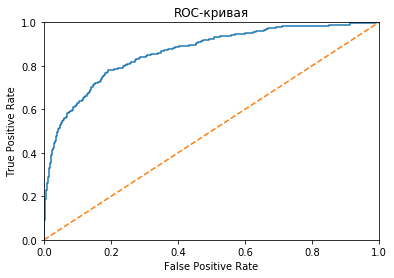

In [29]:
plt.figure()

plt.plot(fpr, tpr)

# ROC-кривая случайной/константной модели
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

ROC_AUC найденной модели превышает значение метрики константной и случайной модели, значит можно делать вывод об адекватности модели.

**ВЫВОД** : Таким образом, проведено исследование данных, подобрана модель, выдающая оптимальные показатели f1 и roc-auc, на основе которой можно прогнозировать отток клиентов. Модель прошла проверку на адекватность.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*